# pivot_table__1

In [1]:
#%load_ext nb_black
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/wtm695450085/Perfect-Plots__GIP/master/kaggletrain.csv")
df.head(2)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


1:80: E501 line too long (108 > 79 characters)


In [4]:
df.pivot(index='Name', columns='Sex', values='Age')

Sex,female,male
Name,,
"Abbing, Mr. Anthony",NaN,42.0
"Abbott, Mr. Rossmore Edward",NaN,16.0
"Abbott, Mrs. Stanton (Rosa Hunt)",35.0,NaN
"Abelson, Mr. Samuel",NaN,30.0
"Abelson, Mrs. Samuel (Hannah Wizosky)",28.0,NaN
...,...,...
"de Mulder, Mr. Theodore",NaN,30.0
"de Pelsmaeker, Mr. Alfons",NaN,16.0
"del Carlo, Mr. Sebastiano",NaN,29.0


In [5]:
df.pivot_table(index='Age', columns = 'Sex', values='Ticket',aggfunc='count').reset_index()

Sex,Age,female,male
0,0.42,NaN,1.0
1,0.67,NaN,1.0
2,0.75,2.0,NaN
3,0.83,NaN,2.0
4,0.92,NaN,1.0
...,...,...,...
83,70.00,NaN,2.0
84,70.50,NaN,1.0
85,71.00,NaN,2.0
86,74.00,NaN,1.0


1:36: E251 unexpected spaces around keyword / parameter equals
1:38: E251 unexpected spaces around keyword / parameter equals
1:61: E231 missing whitespace after ','
1:80: E501 line too long (91 > 79 characters)


Tabela przestawna  pokazująca koszt biletu ofiar katastrofy podzielonych ze względu na wiek.

In [6]:
df.pivot_table(index='Age', columns = 'Sex', values='Fare',aggfunc='sum').reset_index()

Sex,Age,female,male
0,0.42,NaN,8.5167
1,0.67,NaN,14.5000
2,0.75,38.5166,NaN
3,0.83,NaN,47.7500
4,0.92,NaN,151.5500
...,...,...,...
83,70.00,NaN,81.5000
84,70.50,NaN,7.7500
85,71.00,NaN,84.1584
86,74.00,NaN,7.7750


1:36: E251 unexpected spaces around keyword / parameter equals
1:38: E251 unexpected spaces around keyword / parameter equals
1:59: E231 missing whitespace after ','
1:80: E501 line too long (87 > 79 characters)


# airports.csv

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/wtm695450085/Perfect-Plots__GIP/master/airports.csv")
df.head(2)

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN


1:80: E501 line too long (105 > 79 characters)


In [8]:
df.pivot_table(index='iso_country',
               columns='type',
               values='continent',
               aggfunc='count',
               margins=True,
               margins_name='RAZEM')

type,balloonport,closed,heliport,large_airport,medium_airport,seaplane_base,small_airport,RAZEM
iso_country,,,,,,,,
AD,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0
AE,NaN,4.0,21.0,4.0,8.0,3.0,16.0,56.0
AF,NaN,2.0,3.0,NaN,8.0,NaN,51.0,64.0
AG,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
AI,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
ZA,NaN,12.0,4.0,5.0,57.0,NaN,408.0,486.0
ZM,NaN,1.0,NaN,1.0,7.0,NaN,94.0,103.0
ZW,NaN,2.0,NaN,1.0,8.0,NaN,127.0,138.0


In [9]:
df.pivot_table(index=['iso_country', 'type'],
               values='name',
               aggfunc='count').reset_index()

,iso_country,type,name
0,AD,heliport,2
1,AE,closed,4
2,AE,heliport,21
3,AE,large_airport,4
4,AE,medium_airport,8
...,...,...,...
837,ZW,closed,2
838,ZW,large_airport,1
839,ZW,medium_airport,8
840,ZW,small_airport,127


# WEEK

In [10]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/wtm695450085/Perfect-Plots__GIP/master/Energy.csv",
    index_col=0, parse_dates=["Date"]
)
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


2:80: E501 line too long (90 > 79 characters)


In [11]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.week

/home/wojciech/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


# Zużycie energii dla wszystkich lat w tygodniach

In [12]:
kot3 = pd.pivot_table(df,
                      index=['week'],
                      columns='year',
                      values="Consumption",
                      aggfunc='mean')
kot3

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
week,,,,,,,,,,,,
1,1381.300143,1323.127625,1288.477111,1122.246250,1405.912000,1370.802714,1233.527000,1103.339250,1257.046500,1219.086250,1429.120143,1468.473429
2,1486.730286,1483.826143,1482.137143,1366.170429,1454.283714,1429.844143,1361.100714,1322.050286,1458.074857,1459.500000,1508.874714,1544.333571
3,1490.031143,1473.298000,1486.061857,1429.244429,1408.699714,1456.100571,1397.982143,1388.535857,1508.738000,1505.723429,1564.211714,1570.934143
4,1514.176857,1514.921571,1503.636286,1393.819714,1452.648714,1481.277000,1399.240429,1402.458000,1541.613000,1543.364714,1482.912571,1571.222714
5,1501.403286,1475.830429,1483.112857,1378.845143,1461.667571,1476.771714,1461.547286,1319.079429,1546.080571,1528.625286,1474.277429,1516.592429
6,1498.217143,1471.483714,1447.476857,1414.446429,1475.495143,1412.071857,1516.870714,1353.813857,1518.917143,1553.218000,1470.200857,1537.419571
7,1446.507429,1428.536286,1458.576143,1414.740857,1436.442143,1416.529571,1410.695143,1367.142143,1504.625714,1527.346857,1504.355857,1496.527571
8,1447.651429,1400.589429,1485.451429,1391.580143,1415.685286,1451.279286,1330.148857,1348.114857,1481.738143,1504.255286,1478.600000,1477.574571
9,1439.727857,1416.508286,1471.955000,1328.327286,1461.076571,1404.315857,1335.754286,1333.157143,1460.495286,1501.108286,1478.772571,1436.945429


<AxesSubplot:xlabel='week'>

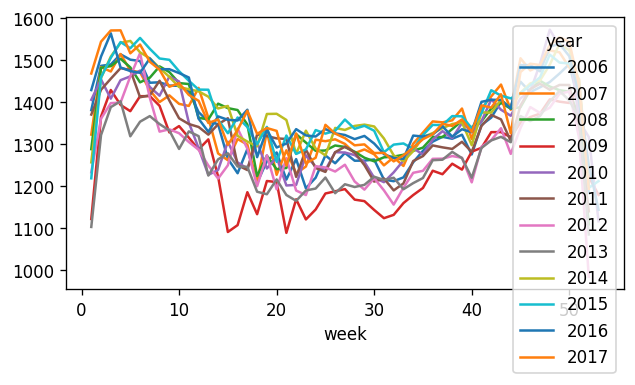

In [13]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (6, 3), 'figure.dpi': 120})

kot3.plot()

# Chce porównać dwa konkretne lata: 2009 i  2014

In [14]:
kot3 = kot3.reset_index()
kot3.head(2)

year,week,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,1,1381.300143,1323.127625,1288.477111,1122.246250,1405.912000,1370.802714,1233.527000,1103.339250,1257.046500,1219.08625,1429.120143,1468.473429
1,2,1486.730286,1483.826143,1482.137143,1366.170429,1454.283714,1429.844143,1361.100714,1322.050286,1458.074857,1459.50000,1508.874714,1544.333571


In [15]:

nor = kot3.pivot_table(index='week',
                       values=[2006,2014],
                       aggfunc='mean')

nor[:4]

year,2006,2014
week,,
1,1381.300143,1257.046500
2,1486.730286,1458.074857
3,1490.031143,1508.738000
4,1514.176857,1541.613000


3:36: E231 missing whitespace after ','


<AxesSubplot:xlabel='week'>

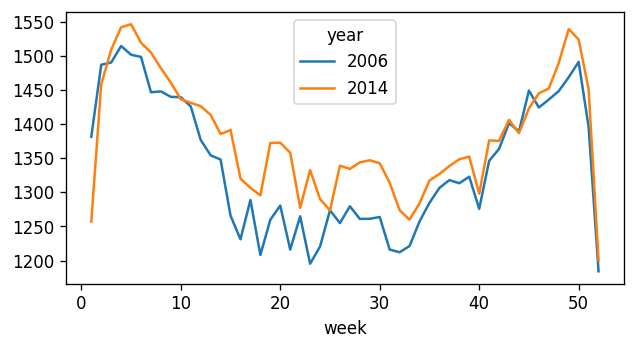

In [16]:
nor.plot()

# Chce porównać dwa konkretne lata: 2009 i  2014 w okresie 20 - 30 week

In [17]:
dfk = kot3.loc[(kot3['week'] >= 20) & (kot3['week'] <= 30), :]
dfk

year,week,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,20,1280.558714,1227.332571,1240.749571,1210.185857,1269.178571,1314.053143,1192.863000,1216.388857,1372.636143,1258.204714,1292.415000,1331.964714
20,21,1216.081000,1285.750571,1243.693143,1089.202143,1202.008000,1312.740143,1267.071000,1179.325857,1357.924714,1320.840714,1301.794286,1249.245286
21,22,1264.780000,1230.739571,1324.166429,1169.190429,1203.472143,1222.447429,1189.975571,1165.471429,1277.319000,1277.022429,1336.100429,1325.870857
22,23,1195.360286,1247.152286,1304.145000,1121.186857,1273.746000,1287.367143,1179.202143,1190.125429,1332.461714,1287.911143,1321.124143,1254.762857
23,24,1220.539143,1311.017429,1284.444714,1144.861571,1246.697714,1243.639143,1247.903857,1194.735857,1289.950714,1333.911571,1318.576714,1267.952571
24,25,1273.592286,1307.390714,1285.255857,1182.918000,1238.947143,1234.298143,1244.830714,1220.914571,1273.486000,1325.489571,1336.252714,1346.359000
25,26,1254.896857,1311.888714,1297.168429,1188.134000,1281.304000,1281.261286,1235.240714,1183.650857,1338.999714,1332.166286,1326.099429,1325.580714
26,27,1279.510571,1300.935286,1293.684857,1193.408857,1280.432571,1294.264429,1251.404857,1204.902429,1334.192429,1359.002429,1322.204857,1314.684286
27,28,1260.945286,1279.052429,1282.277429,1168.313714,1274.332286,1280.724714,1211.444571,1198.380429,1343.773429,1336.907714,1312.309714,1297.575286
28,29,1261.179714,1287.784000,1268.052714,1164.737000,1257.932857,1250.456714,1192.170571,1203.554857,1346.845857,1344.087714,1319.934714,1299.805429


<AxesSubplot:xlabel='week'>

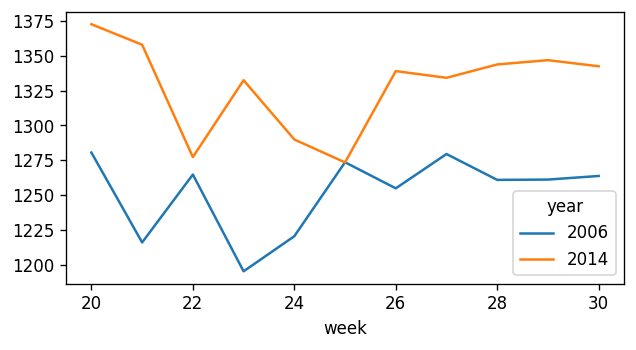

2:24: E127 22
3:24: E127 22


In [18]:
nor = dfk.pivot_table(index='week',
                       values=[2006, 2014],
                       aggfunc='mean')

nor.plot()

In [19]:
url = 'https://raw.githubusercontent.com/wtm695450085/Perfect-Plots__GIP/master/drinksbycountry.csv'
df = pd.read_csv(url)
df.head(2)

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0,0,0,0.0,Asia
1,1,Albania,89,132,54,4.9,Europe


1:80: E501 line too long (100 > 79 characters)


In [20]:
df.pivot_table(index=['continent'],
               values=['beer_servings',
                       'wine_servings',
                       'spirit_servings'],
               aggfunc='mean').reset_index()

,continent,beer_servings,spirit_servings,wine_servings
0,Africa,61.471698,16.339623,16.264151
1,Asia,37.045455,60.840909,9.068182
2,Europe,193.777778,132.555556,142.222222
3,North America,145.434783,165.739130,24.521739
4,Oceania,89.687500,58.437500,35.625000
5,South America,175.083333,114.750000,62.416667


In [21]:
df.pivot_table(index='continent',
               values=['beer_servings',
                       'spirit_servings',
                       'wine_servings'],
               aggfunc='mean',
               margins=True,
               margins_name='Średnia:')

,beer_servings,spirit_servings,wine_servings
continent,,,
Africa,61.471698,16.339623,16.264151
Asia,37.045455,60.840909,9.068182
Europe,193.777778,132.555556,142.222222
North America,145.434783,165.739130,24.521739
Oceania,89.687500,58.437500,35.625000
South America,175.083333,114.750000,62.416667
Średnia:,106.160622,80.994819,49.450777


<AxesSubplot:xlabel='continent'>

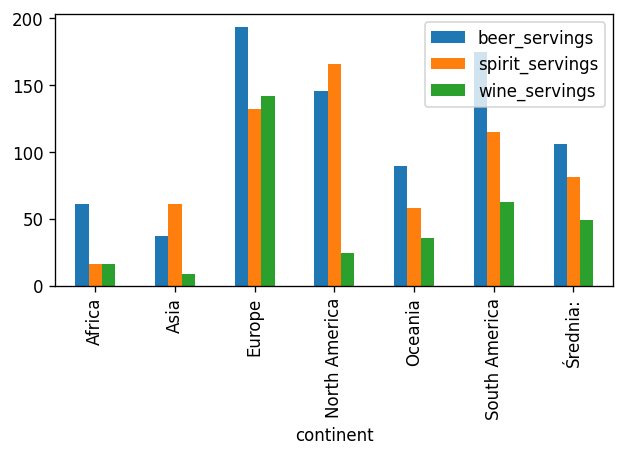

In [22]:
df.pivot_table(index='continent',
               values=['beer_servings', 'spirit_servings', 'wine_servings'],
               aggfunc='mean',
               margins=True,
               margins_name='Średnia:').plot(kind='bar')

In [23]:
url = 'https://raw.githubusercontent.com/wtm695450085/Perfect-Plots__GIP/master/uforeports.csv'
df = pd.read_csv(url)
df.head(2)

,Unnamed: 0,City,Colors Reported,Shape Reported,State,Time
0,0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


1:80: E501 line too long (95 > 79 characters)


In [24]:
df.pivot_table(index=['Shape Reported'],
               values=['State'],
               aggfunc='count',
               margins=True).reset_index()

,Shape Reported,State
0,CHEVRON,248
1,CIGAR,618
2,CIRCLE,1367
3,CONE,60
4,CRESCENT,2
5,CROSS,36
6,CYLINDER,295
7,DELTA,7
8,DIAMOND,234
9,DISK,2125


# RODZAJE UFO STRUKTURA

array([<AxesSubplot:ylabel='State'>], dtype=object)

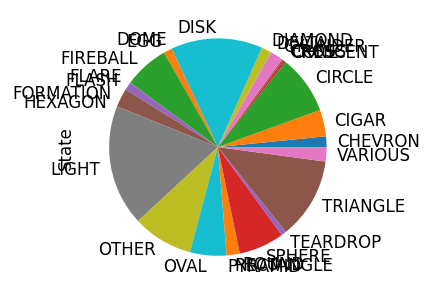

In [25]:
df.pivot_table(index='Shape Reported',
               values='State',
               aggfunc='count').plot(kind='pie',
                                     subplots=True,
                                     legend=False)

In [26]:
url = 'https://raw.githubusercontent.com/wtm695450085/Perfect-Plots__GIP/master/WorldHappinessReport.csv'
df = pd.read_csv(url)
df.head(2)

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,0,Afghanistan,Southern Asia,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015.0
1,1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,2015.0


1:80: E501 line too long (105 > 79 characters)


<AxesSubplot:title={'center':'Zadowolenie na świecie'}, xlabel='Region'>

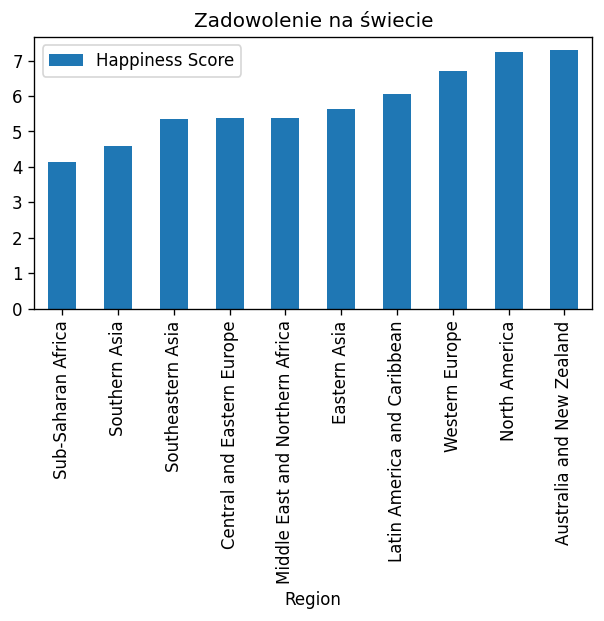

In [27]:
df2 = df.pivot_table(index='Region',
                     values='Happiness Score', aggfunc='mean')
df2.sort_values('Happiness Score').plot(kind='bar',
                                        title="Zadowolenie na świecie")

<AxesSubplot:title={'center':'Zadowolenie na świecie'}, ylabel='Region'>

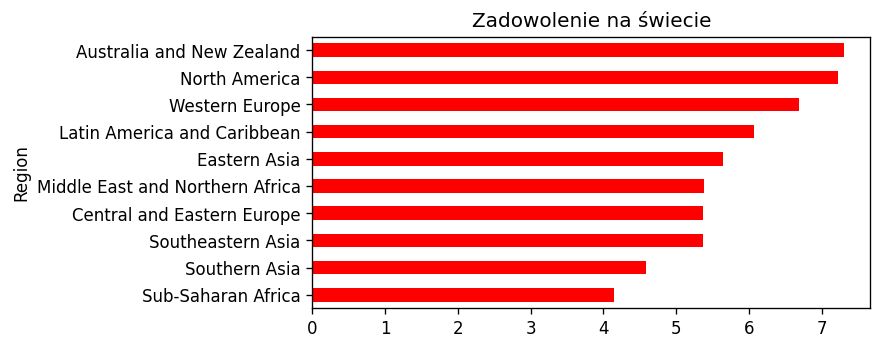

In [28]:
df2.sort_values('Happiness Score').plot(kind='barh',
                                        title="Zadowolenie na świecie",
                                        legend=False,
                                        color=['r'])

In [29]:
pd.pivot_table(df, index=['Region', 'Year'], values="Happiness Score")

Happiness Score
Region                          Year                   
Australia and New Zealand       2015.0         7.285000
                                2016.0         7.323500
                                2017.0         7.299000
Central and Eastern Europe      2015.0         5.332931
                                2016.0         5.370690
                                2017.0         5.409931
Eastern Asia                    2015.0         5.626167
                                2016.0         5.624167
                                2017.0         5.681600
Latin America and Caribbean     2015.0         6.144682
                                2016.0         6.101750
                                2017.0         5.957818
Middle East and Northern Africa 2015.0         5.406900
                                2016.0         5.386053
                                2017.0         5.369684
North America                   2015.0         7.273000
                                2016.0         7.254000
                                2017.0         7.154500
Southeastern Asia               2015.0         5.317444
                                2016.0         5.338889
                                2017.0         5.444875
Southern Asia                   2015.0         4.580857
                                2016.0         4.563286
                                2017.0         4.628429
Sub-Saharan Africa              2015.0         4.202800
                                2016.0         4.136421
                                2017.0         4.111949
Western Europe                  2015.0         6.689619
                                2016.0         6.685667
                                2017.0         6.703714

<AxesSubplot:ylabel='Region,Year'>

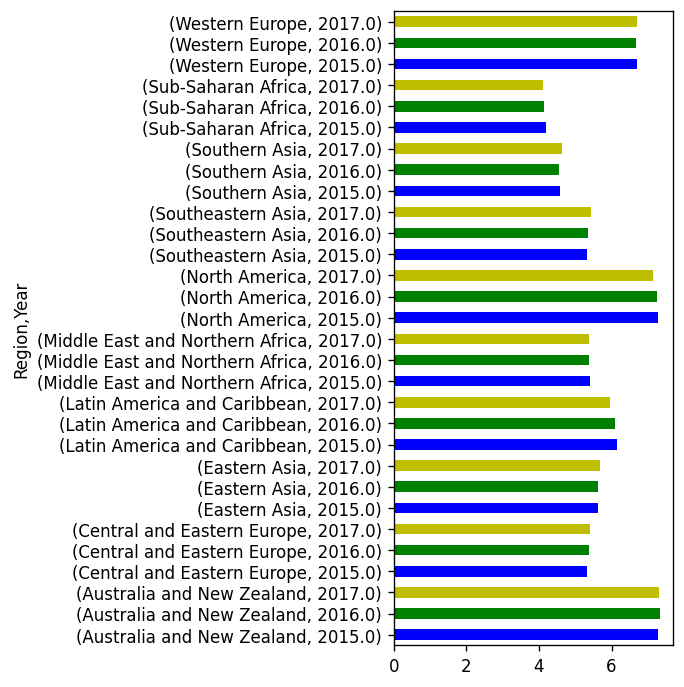

In [30]:
df.pivot_table(index=['Region', 'Year'],
               values='Happiness Score').plot(kind='barh',
                                              figsize=(3, 7),
                                              color=('b', 'g', 'y'),
                                              legend=False)

In [31]:
pd.pivot_table(df, index='Region', columns='Year', values="Happiness Score")

Year,2015.0,2016.0,2017.0
Region,,,
Australia and New Zealand,7.285000,7.323500,7.299000
Central and Eastern Europe,5.332931,5.370690,5.409931
Eastern Asia,5.626167,5.624167,5.681600
Latin America and Caribbean,6.144682,6.101750,5.957818
Middle East and Northern Africa,5.406900,5.386053,5.369684
North America,7.273000,7.254000,7.154500
Southeastern Asia,5.317444,5.338889,5.444875
Southern Asia,4.580857,4.563286,4.628429
Sub-Saharan Africa,4.202800,4.136421,4.111949


<AxesSubplot:xlabel='Region'>

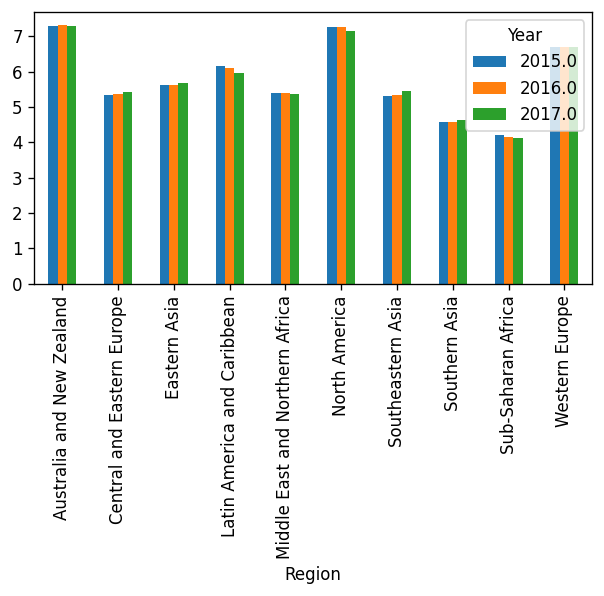

In [32]:
DD = pd.pivot_table(df, index='Region',
                    columns='Year',
                    values="Happiness Score")
DD.plot(kind='bar')

In [33]:
pd.pivot_table(df, index='Region',
               values="Happiness Score",
               aggfunc=[np.mean, np.median, min, max, np.std])

,mean,median,min,max,std
,Happiness Score,Happiness Score,Happiness Score,Happiness Score,Happiness Score
Region,,,,,
Australia and New Zealand,7.302500,7.2995,7.284,7.334,0.020936
Central and Eastern Europe,5.371184,5.4010,4.096,6.609,0.578274
Eastern Asia,5.641765,5.8350,4.874,6.422,0.515907
Latin America and Caribbean,6.069074,6.1265,3.603,7.226,0.728157
Middle East and Northern Africa,5.387879,5.3175,3.006,7.278,1.031656
North America,7.227167,7.2175,6.993,7.427,0.179331
Southeastern Asia,5.364077,5.2965,3.819,6.798,0.882637
Southern Asia,4.590857,4.6080,3.360,5.269,0.535978


In [34]:
pd.pivot_table(df, index='Region',
               values="Happiness Score",
               aggfunc='count')
df.Region.value_counts().to_frame()

,Region
Sub-Saharan Africa,129
Central and Eastern Europe,87
Latin America and Caribbean,72
Western Europe,63
Middle East and Northern Africa,60
Southeastern Asia,27
Southern Asia,21
Eastern Asia,21
North America,6
Australia and New Zealand,6


In [35]:
df2 = df.pivot_table(index='Region',
                   values='Country',
                   aggfunc='count',
                   margins=True,
                   margins_name='Razem')

df2.sort_values('Country')

,Country
Region,
Australia and New Zealand,6
North America,6
Eastern Asia,21
Southern Asia,21
Southeastern Asia,27
Middle East and Northern Africa,60
Western Europe,63
Latin America and Caribbean,72
Central and Eastern Europe,87


2:20: E128 21
3:20: E128 21
4:20: E128 21
5:20: E128 21


In [36]:
#%load_ext nb_black

1:1: E265 block comment should start with '# '


array([<AxesSubplot:ylabel='Country'>], dtype=object)

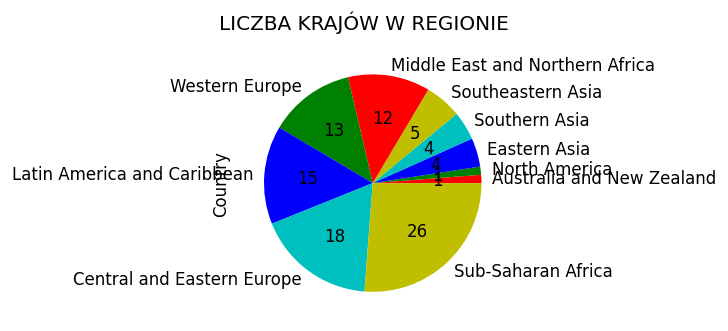

In [37]:
df2 = df.pivot_table(index="Region",
                     values="Country",
                     aggfunc="count").sort_values("Country")

df2.plot(
    kind="pie",
    subplots=True,
    legend=False,
    autopct="%.0f",
    colors=["r", "g", "b", "c", "y"],
    title="LICZBA KRAJÓW W REGIONIE")

# LAMBDA

In [40]:
pd.pivot_table(df,
               index='Region',
               values="Happiness Score",
               aggfunc=[min, max, lambda x: x.count()/3])

,min,max,<lambda>
,Happiness Score,Happiness Score,Happiness Score
Region,,,
Australia and New Zealand,7.284,7.334,2.000000
Central and Eastern Europe,4.096,6.609,29.000000
Eastern Asia,4.874,6.422,5.666667
Latin America and Caribbean,3.603,7.226,22.666667
Middle East and Northern Africa,3.006,7.278,19.333333
North America,6.993,7.427,2.000000
Southeastern Asia,3.819,6.798,8.666667
Southern Asia,3.360,5.269,7.000000


# WYŁACZENIE TYLKO JEDNEGO KONTYNENTU!!

In [45]:
df3 = pd.pivot_table(df,
                     index='Region',
                     values="Happiness Score",
                     aggfunc=[np.mean, max])

df3[df3.index.str.contains('Asia')]

,mean,max
,Happiness Score,Happiness Score
Region,,
Eastern Asia,5.641765,6.422
Southeastern Asia,5.364077,6.798
Southern Asia,4.590857,5.269


In [55]:
df5 = pd.pivot_table(df,
                     index=['Region', 'Year'],
                     values='Happiness Score',
                     aggfunc=[np.mean, np.median, np.std])

df5.query('Year == [2015, 2017] and Region == ["Sub-Saharan Africa", "Middle East and Northern Africa"]')

mean          median  \
                                       Happiness Score Happiness Score   
Region                          Year                                     
Middle East and Northern Africa 2015.0        5.406900           5.262   
                                2017.0        5.369684           5.336   
Sub-Saharan Africa              2015.0        4.202800           4.272   
                                2017.0        4.111949           4.120   

                                                   std  
                                       Happiness Score  
Region                          Year                    
Middle East and Northern Africa 2015.0        1.101382  
                                2017.0        0.985246  
Sub-Saharan Africa              2015.0        0.609557  
                                2017.0        0.595688

6:80: E501 line too long (105 > 79 characters)


# Podział na cztery kwarty i podsumowanie według kwart!!

In [58]:
foka = pd.qcut(df["Happiness Score"], 4)

pd.pivot_table(df,
               index=['Region', foka],
               values="Happiness Score",
               aggfunc='count')

Happiness Score
Region                          Happiness Score                 
Australia and New Zealand       (6.239, 7.587]               6.0
Central and Eastern Europe      (2.692, 4.508]              10.0
                                (4.508, 5.279]              28.0
                                (5.279, 6.239]              46.0
                                (6.239, 7.587]               3.0
Eastern Asia                    (4.508, 5.279]               6.0
                                (5.279, 6.239]               8.0
                                (6.239, 7.587]               3.0
Latin America and Caribbean     (2.692, 4.508]               2.0
                                (4.508, 5.279]               8.0
                                (5.279, 6.239]              28.0
                                (6.239, 7.587]              30.0
Middle East and Northern Africa (2.692, 4.508]               9.0
                                (4.508, 5.279]              19.0
                                (5.279, 6.239]              15.0
                                (6.239, 7.587]              15.0
North America                   (6.239, 7.587]               6.0
Southeastern Asia               (2.692, 4.508]               5.0
                                (4.508, 5.279]               8.0
                                (5.279, 6.239]               7.0
                                (6.239, 7.587]               6.0
Southern Asia                   (2.692, 4.508]               8.0
                                (4.508, 5.279]              13.0
Sub-Saharan Africa              (2.692, 4.508]              84.0
                                (4.508, 5.279]              29.0
                                (5.279, 6.239]               4.0
Western Europe                  (4.508, 5.279]               6.0
                                (5.279, 6.239]               9.0
                                (6.239, 7.587]              48.0

In [59]:
url = 'https://raw.githubusercontent.com/wtm695450085/Perfect-Plots__GIP/master/autos.csv'
df = pd.read_csv(url)
df.head(2)

,Unnamed: 0,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0


1:80: E501 line too long (90 > 79 characters)


# Jedyny sposób żeby to zrobić!!

In [72]:
df.pivot_table(index='make',
               columns='body_style',
               aggfunc={'body_style':len},
               fill_value=0)

body_style                              
body_style    convertible hardtop hatchback sedan wagon
make                                                   
alfa-romero             2       0         1     0     0
audi                    0       0         1     5     1
bmw                     0       0         0     8     0
chevrolet               0       0         2     1     0
dodge                   0       0         5     3     1
honda                   0       0         7     5     1
isuzu                   0       0         1     3     0
jaguar                  0       0         0     3     0
mazda                   0       0        10     7     0
mercedes-benz           1       2         0     4     1
mercury                 0       0         1     0     0
mitsubishi              0       0         9     4     0
nissan                  0       1         5     9     3
peugot                  0       0         0     7     4
plymouth                0       0         4     2     1
porsche                 1       2         2     0     0
renault                 0       0         1     0     1
saab                    0       0         3     3     0
subaru                  0       0         3     5     4
toyota                  1       3        14    10     4
volkswagen              1       0         1     9     1
volvo                   0       0         0     8     3

ValueError: too many values to unpack (expected 3)

In [73]:
KF = df.pivot_table(index='make', columns='body_style', aggfunc={'body_style':len}, fill_value=0)
KF.loc['Razem']=KF.sum(axis=0)
KF

body_style                              
body_style    convertible hardtop hatchback sedan wagon
make                                                   
alfa-romero             2       0         1     0     0
audi                    0       0         1     5     1
bmw                     0       0         0     8     0
chevrolet               0       0         2     1     0
dodge                   0       0         5     3     1
honda                   0       0         7     5     1
isuzu                   0       0         1     3     0
jaguar                  0       0         0     3     0
mazda                   0       0        10     7     0
mercedes-benz           1       2         0     4     1
mercury                 0       0         1     0     0
mitsubishi              0       0         9     4     0
nissan                  0       1         5     9     3
peugot                  0       0         0     7     4
plymouth                0       0         4     2     1
porsche                 1       2         2     0     0
renault                 0       0         1     0     1
saab                    0       0         3     3     0
subaru                  0       0         3     5     4
toyota                  1       3        14    10     4
volkswagen              1       0         1     9     1
volvo                   0       0         0     8     3
Razem                   6       8        70    96    25

ValueError: too many values to unpack (expected 3)

In [77]:
df.pivot_table(index='make',
               columns='num_doors',
               values='symboling',
               margins=True,
               aggfunc='count').fillna('')

num_doors,four,two,All
make,,,
alfa-romero,,3,3
audi,5,2,7
bmw,5,3,8
chevrolet,1,2,3
dodge,4,4,8
honda,5,8,13
isuzu,2,2,4
jaguar,2,1,3
mazda,7,9,16


<AxesSubplot:xlabel='None-num_doors', ylabel='make'>

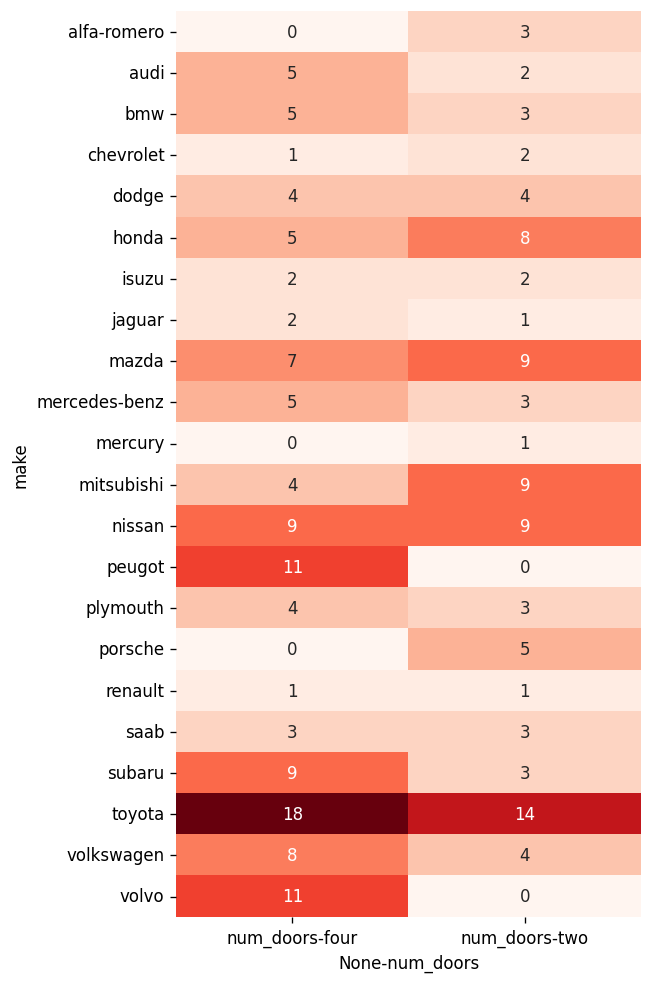

ValueError: too many values to unpack (expected 3)

In [106]:
import seaborn as sns

df2 = df.pivot_table(index='make',
                     columns='num_doors',
                     aggfunc={'num_doors':len},
                     fill_value=0) # jeżeli nie ma wstawia zero         


plt.figure(figsize=(5,10))
sns.heatmap(df2, cmap="Reds",
            annot=True,
            cbar=False)

In [91]:
df.pivot_table(index='make',
               columns='body_style',
               values='curb_weight',
               aggfunc=np.mean,
               fill_value=0)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
alfa-romero,2548,0,2823.000000,0.000000,0.000000
audi,0,0,3053.000000,2719.600000,2954.000000
bmw,0,0,0.000000,2929.375000,0.000000
chevrolet,0,0,1681.000000,1909.000000,0.000000
dodge,0,0,2131.600000,2056.333333,2535.000000
honda,0,0,1970.000000,2288.800000,2024.000000
isuzu,0,0,2734.000000,2040.000000,0.000000
jaguar,0,0,0.000000,4027.333333,0.000000
mazda,0,0,2253.500000,2361.142857,0.000000


In [96]:
df.pivot_table(index='make',
               columns=['body_style', 'drive_wheels'],
               values='price',
               aggfunc='count').fillna('')

body_style    convertible     hardtop     hatchback         sedan          \
drive_wheels          fwd rwd     fwd rwd       4wd fwd rwd   4wd fwd rwd   
make                                                                        
alfa-romero                 2                             1                 
audi                                              0             1   4       
bmw                                                                     8   
chevrolet                                             2             1       
dodge                                                 5             3       
honda                                                 7             5       
isuzu                                                     1         0   1   
jaguar                                                                  3   
mazda                                                 6   4         5   2   
mercedes-benz               1           2                               4   
mercury                                                   1                 
mitsubishi                                            9             4       
nissan                              1                 2   3         9       
peugot                                                                  7   
plymouth                                              3   1         2       
porsche                     1           2                 1                 
renault                                               1                     
saab                                                  3             3       
subaru                                            1   2         2   3       
toyota                      1           3             8   6         7   3   
volkswagen              1                             1             9       
volvo                                                                   8   

body_style    wagon          
drive_wheels    4wd fwd rwd  
make                         
alfa-romero                  
audi                  1      
bmw                          
chevrolet                    
dodge                 1      
honda                 1      
isuzu                        
jaguar                       
mazda                        
mercedes-benz             1  
mercury                      
mitsubishi                   
nissan                3      
peugot                    4  
plymouth              1      
porsche                      
renault               1      
saab                         
subaru            2   2      
toyota            2   1   1  
volkswagen            1      
volvo                     3

<AxesSubplot:xlabel='body_style-drive_wheels', ylabel='make'>

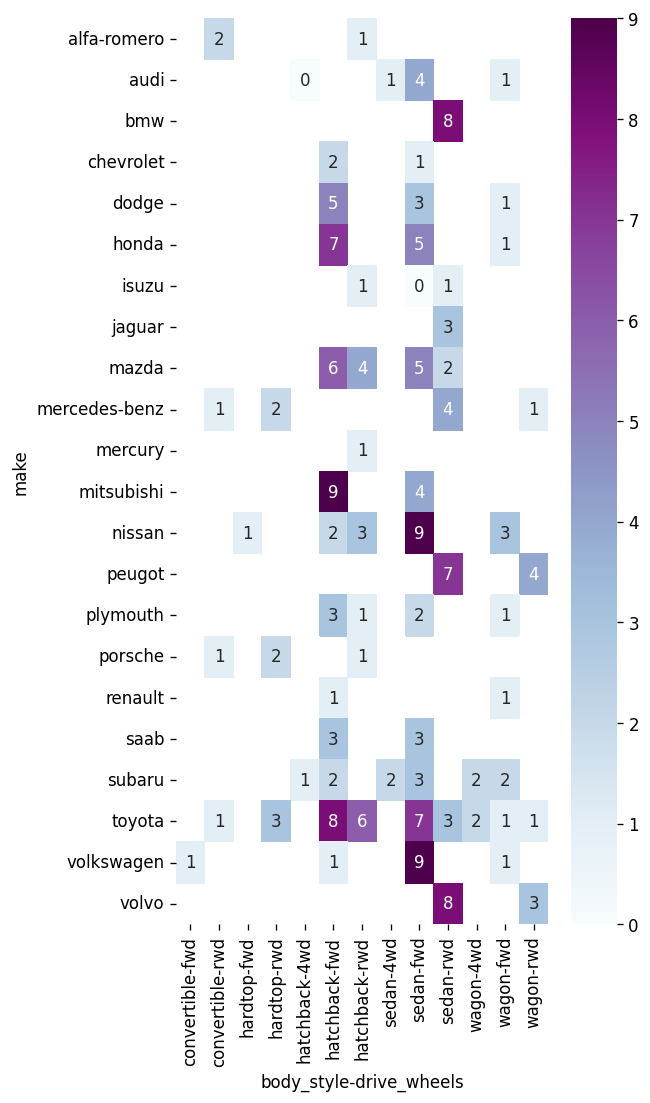

In [99]:
df2 = df.pivot_table(index='make',
                     columns=['body_style', 'drive_wheels'],
                     values='price',
                     aggfunc='count')

plt.figure(figsize=(5, 10))

sns.heatmap(df2,
            cmap="BuPu",
            annot=True,
            cbar=True)

In [102]:
df.pivot_table(index='fuel_type',
               columns=['body_style', 'drive_wheels'],
               values='price',
               aggfunc='mean').applymap('{:,.0f}$'.format)

body_style   convertible          hardtop          hatchback                   \
drive_wheels         fwd      rwd     fwd      rwd       4wd     fwd      rwd   
fuel_type                                                                       
diesel              nan$     nan$    nan$  28,176$      nan$  7,788$     nan$   
gas              11,595$  23,950$  8,249$  23,540$    7,603$  8,409$  14,338$   

body_style      sedan                    wagon                   
drive_wheels      4wd     fwd      rwd     4wd     fwd      rwd  
fuel_type                                                        
diesel           nan$  9,450$  20,859$    nan$    nan$  19,728$  
gas           12,647$  9,873$  21,918$  9,096$  9,997$  15,628$

<AxesSubplot:xlabel='num_doors-drive_wheels', ylabel='make'>

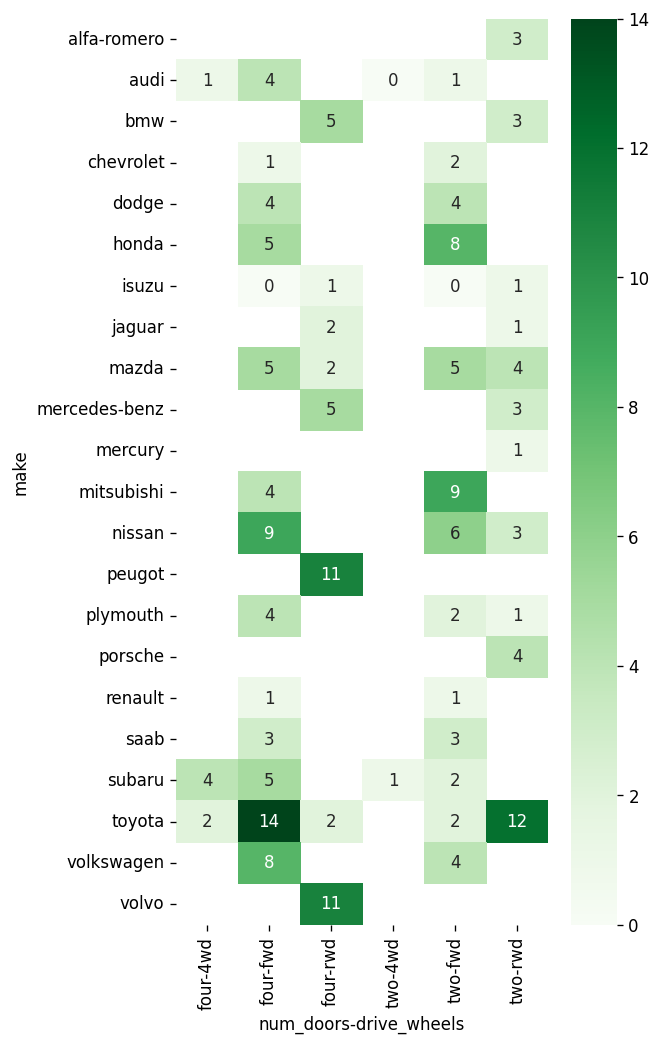

1:56: E231 missing whitespace after ','
1:72: E231 missing whitespace after ','
1:80: E501 line too long (104 > 79 characters)
2:22: E231 missing whitespace after ','


In [103]:
df2 = df.pivot_table(index='make', columns=['num_doors','drive_wheels'],values='price', aggfunc='count')
plt.figure(figsize=(5,10))
sns.heatmap(df2, cmap="Greens", annot=True, cbar=True)

In [107]:
url = 'https://raw.githubusercontent.com/wtm695450085/Perfect-Plots__GIP/master/WorldHappinessReport.csv'
df = pd.read_csv(url)
df.head(2)

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,0,Afghanistan,Southern Asia,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015.0
1,1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,2015.0


1:80: E501 line too long (105 > 79 characters)


In [110]:
KOT = ['Źle', 'średnio', 'dobrze', 'super']

foka = pd.qcut(df["Happiness Score"], 4, labels=KOT)

pd.pivot_table(df,
               index=['Region', foka],
               values="Happiness Score",
               aggfunc='count',
               margins=True,
               margins_name='Total count')

Happiness Score
Region                          Happiness Score                 
Australia and New Zealand       super                        6.0
Central and Eastern Europe      Źle                         10.0
                                średnio                     28.0
                                dobrze                      46.0
                                super                        3.0
Eastern Asia                    średnio                      6.0
                                dobrze                       8.0
                                super                        3.0
Latin America and Caribbean     Źle                          2.0
                                średnio                      8.0
                                dobrze                      28.0
                                super                       30.0
Middle East and Northern Africa Źle                          9.0
                                średnio                     19.0
                                dobrze                      15.0
                                super                       15.0
North America                   super                        6.0
Southeastern Asia               Źle                          5.0
                                średnio                      8.0
                                dobrze                       7.0
                                super                        6.0
Southern Asia                   Źle                          8.0
                                średnio                     13.0
Sub-Saharan Africa              Źle                         84.0
                                średnio                     29.0
                                dobrze                       4.0
Western Europe                  średnio                      6.0
                                dobrze                       9.0
                                super                       48.0
Total count                                                469.0

# Funkcja obcinająca ekstremalne wartości poza rozkładem normalnym

In [118]:
def remove_outliers(values):
    mid_quantiles = values.quantile([.25, .75])
    return np.mean(mid_quantiles)

2:18: E225 missing whitespace around operator


In [119]:
pd.pivot_table(df,
               index='Region',
               values="Happiness Score",
               aggfunc=[np.mean, remove_outliers])

,mean,remove_outliers
,Happiness Score,Happiness Score
Region,,
Australia and New Zealand,7.302500,7.299125
Central and Eastern Europe,5.371184,5.449250
Eastern Asia,5.641765,5.614500
Latin America and Caribbean,6.069074,6.192750
Middle East and Northern Africa,5.387879,5.508500
North America,7.227167,7.244875
Southeastern Asia,5.364077,5.470125
Southern Asia,4.590857,4.707500


In [122]:
df.pivot_table(index='Country',
               values='Freedom',
               aggfunc=[np.median, np.std, lambda x: x.median() - x.std()])

,median,std,<lambda>
,Freedom,Freedom,Freedom
Afghanistan,0.164300,0.064070,0.100230
Albania,0.357330,0.031697,0.325633
Algeria,0.233336,0.038791,0.194545
Angola,0.005890,0.058326,-0.052436
Argentina,0.449740,0.036209,0.413531
...,...,...,...
Venezuela,0.198470,0.147665,0.050805
Vietnam,0.571056,0.017783,0.553272
Yemen,0.249464,0.068131,0.181333


In [125]:
df.pivot_table(index='Country',
               values='Health (Life Expectancy)',
               aggfunc=lambda z: z.mean()*100)

,Health (Life Expectancy)
Country,
Afghanistan,21.917893
Albania,75.815992
Algeria,61.776155
Angola,8.886956
Argentina,72.649236
...,...
Venezuela,65.223474
Vietnam,68.683300
Yemen,34.040031


# Proszę pokazać 5 krajów z najdłuższym czasem życia: 
'Central and Eastern Europe'
5 krajów


In [135]:
df2 = df.pivot_table(index=['Region', 'Country'],
                     values='Health (Life Expectancy)',
                     aggfunc= lambda z: z.mean()*100).reset_index()

df3 = df2[df2.Region=='Central and Eastern Europe'][['Country', 'Health (Life Expectancy)']]
df3.sort_values('Health (Life Expectancy)', ascending=False)[:5]

,Country,Health (Life Expectancy)
26,Slovenia,81.856941
9,Czech Republic,78.767800
2,Albania,75.815992
25,Slovakia,73.514097
6,Bosnia And Herzegovina,73.455210


3:30: E251 unexpected spaces around keyword / parameter equals
5:21: E225 missing whitespace around operator
5:80: E501 line too long (92 > 79 characters)
